In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 载入数据

In [2]:
data = pd.read_csv("../data/watermelon.csv")
data.columns = ["id", "density", "sugar", "good"]
data = data[["density", "sugar", "good"]]
data.head()

,density,sugar,good
0,0.697,0.460,是
1,0.774,0.376,是
2,0.634,0.264,是
3,0.608,0.318,是
4,0.556,0.215,是


In [4]:
data['good'] = data['good'].apply(lambda x: 1 if x == '是' else 0)
data.head()

,density,sugar,good
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1


In [5]:
X = data.values[:, :2]
y = data.values[:, 2]

## 决策边界

In [6]:
def counterPlot(X, y, clf):
    plot_colors = "br"
    plot_step = 0.02
    class_names = "01"

    plt.figure(figsize=(10, 5))

    # Plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    
    plt.show()

### KNN的决策边界

knn的边界不依赖与座标轴，即其边界可以是任意的，不用与座标轴平行。

In [9]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)

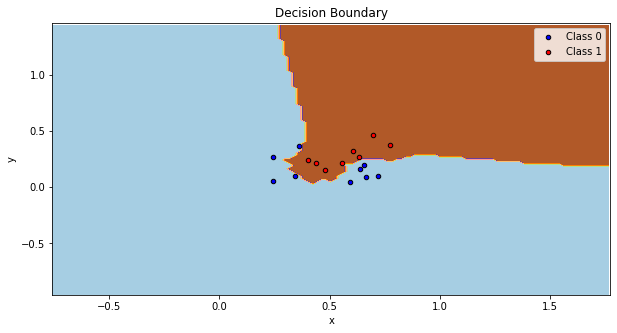

In [10]:
counterPlot(X, y, knn)

## 决策树边界
决策树的因其本身的性质，其边界是由一系列和座标轴平行的线段围成的。

In [11]:
clf = DecisionTreeClassifier(random_state=0).fit(X, y)

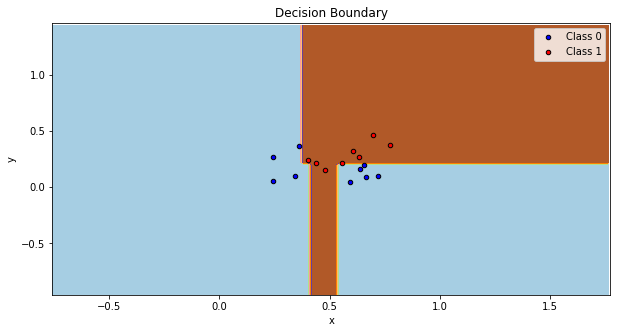

In [12]:
counterPlot(X, y, clf)